<a href="https://colab.research.google.com/github/ymsang/trendingword_project1/blob/main/AI_02_%EC%83%81%EC%9C%A0%EB%AF%B8_CS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#코드스테이츠 AI 2기 프로젝트1
유튜브 트랜드 용어 분석

###code

In [ ]:
import re
import requests
from bs4 import BeautifulSoup
import pandas as pd


In [ ]:
#pandas profiling installation
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
from pandas_profiling import ProfileReport



     |████████████████████████████████| 80 kB 4.5 MB/s 
     |████████████████████████████████| 245 kB 26.7 MB/s 
     |████████████████████████████████| 102 kB 42.1 MB/s 
     |████████████████████████████████| 675 kB 42.9 MB/s 
     |████████████████████████████████| 62 kB 799 kB/s 
     |████████████████████████████████| 3.1 MB 43.0 MB/s 
     |████████████████████████████████| 812 kB 36.8 MB/s 
     |████████████████████████████████| 28.5 MB 46 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=71bbd6da915ec47d8140f21af5fc5c4756ed18fdc1c7422c13f9ac9505db1407
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=773a9b3b46db405a8b555f17fc81e16d75137d69cd847491b01640ed6df8ed43
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully 

In [ ]:
#mount gdrive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# #drive folder
# /content/drive/My Drive/location_of_the_file #format "location of the file"

###data

In [ ]:
#use pandas to open csv file
import pandas as pd 
df = pd.read_csv('/content/drive/MyDrive/data/USvideos/USvideos.csv')
# df = pd.read_csv('USvideos.csv')

df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np


##data with deleted columns

In [ ]:
#find column names
df.columns

del_col= ['video_id', 'publish_time', 'thumbnail_link','video_error_or_removed', 'comments_disabled', 'ratings_disabled', 'description']

df = df.drop(del_col, axis=1)
df

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518
...,...,...,...,...,...,...,...,...,...
40944,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657
40945,18.14.06,True Facts : Ant Mutualism,zefrank1,22,[none],1064798,60008,382,3936
40946,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992
40947,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088


###data profiling

In [ ]:
# profile = ProfileReport(df, minimal=True).to_notebook_iframe()
profile = df.profile_report()
profile

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import warnings
warnings.filterwarnings('ignore')
%config Completer.use_jedi = False # if autocompletion doesnot work in kaggle notebook | hit tab

In [ ]:
#drop duplicated rows
df.drop_duplicates().reset_index().drop('index', axis=1)

,trending_date,title,channel_title,category_id,tags,views,likes,dislikes,comment_count
0,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,SHANtell martin,748374,57527,2966,15954
1,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181
3,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146
4,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518
...,...,...,...,...,...,...,...,...,...
40896,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657
40897,18.14.06,True Facts : Ant Mutualism,zefrank1,22,[none],1064798,60008,382,3936
40898,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992
40899,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   trending_date  40949 non-null  object
 1   title          40949 non-null  object
 2   channel_title  40949 non-null  object
 3   category_id    40949 non-null  int64 
 4   tags           40949 non-null  object
 5   views          40949 non-null  int64 
 6   likes          40949 non-null  int64 
 7   dislikes       40949 non-null  int64 
 8   comment_count  40949 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.8+ MB


##like, views, dislikes, comment distribution

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS



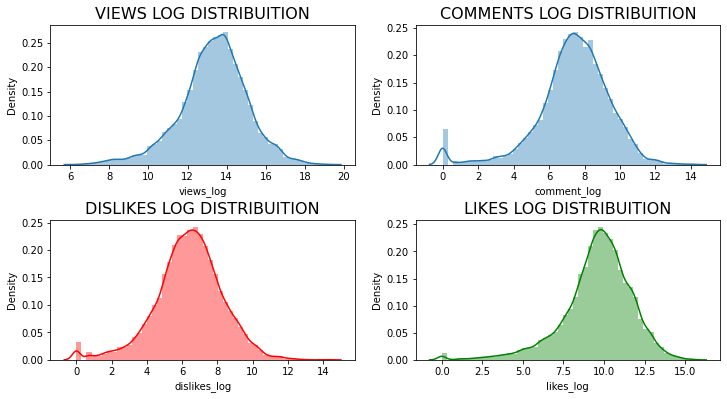

In [ ]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df['views_log'])
g1.set_title("VIEWS LOG DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['likes_log'],color='green')
g2.set_title('LIKES LOG DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color='r')
g3.set_title("DISLIKES LOG DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['comment_log'])
g4.set_title("COMMENTS LOG DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [ ]:
print("Views quantiles")
print(df['views'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01        4209.84
0.25      242329.00
0.50      681861.00
0.75     1823157.00
0.99    29917344.32
Name: views, dtype: float64

Likes quantiles
0.01        15.00
0.25      5424.00
0.50     18091.00
0.75     55417.00
0.99    923015.92
Name: likes, dtype: float64

Dislikes quantiles
0.01        1.00
0.25      202.00
0.50      631.00
0.75     1938.00
0.99    43562.28
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.0
0.25       614.0
0.50      1856.0
0.75      5755.0
0.99    100603.6
Name: comment_count, dtype: float64


###code

In [ ]:
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

##category

Category Name count
Entertainment       9964
Music               6472
How to and Style    4146
Comedy              3457
People and Blogs    3210
Name: category_name, dtype: int64


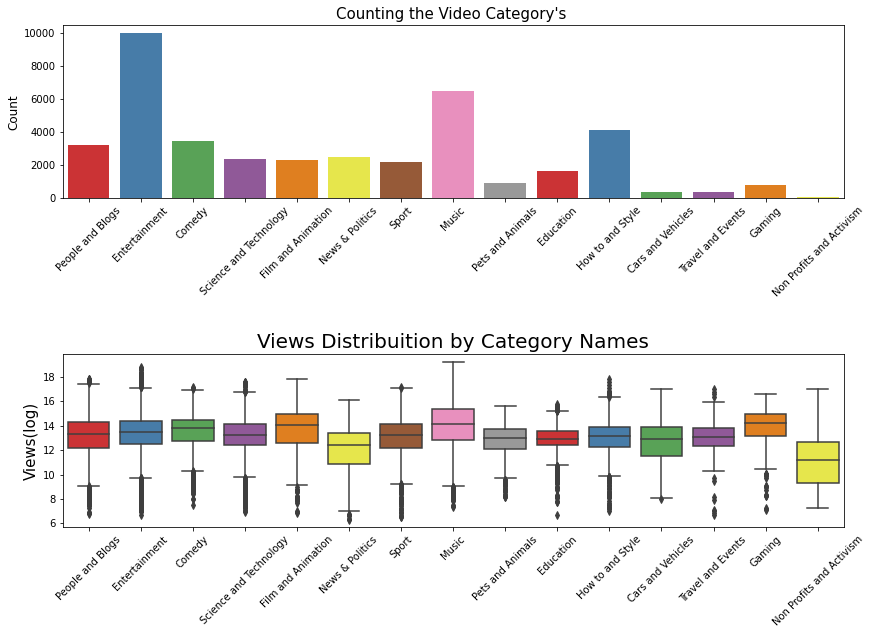

In [ ]:
print("Category Name count")
print(df.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

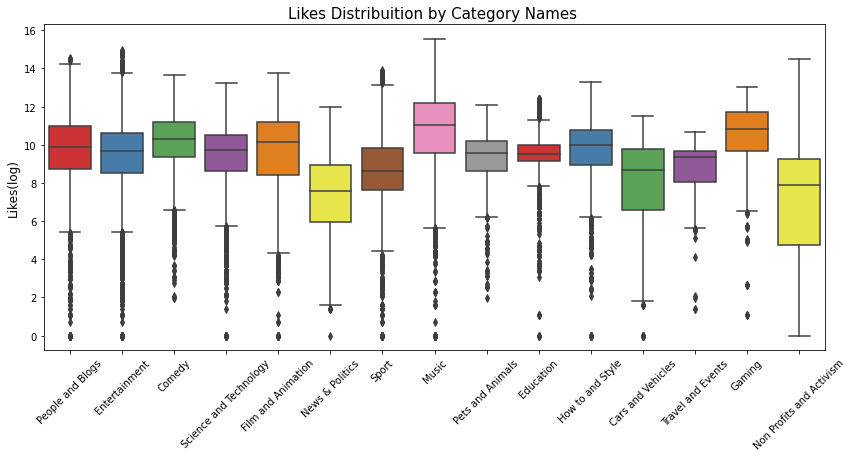

In [ ]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='likes_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.show()

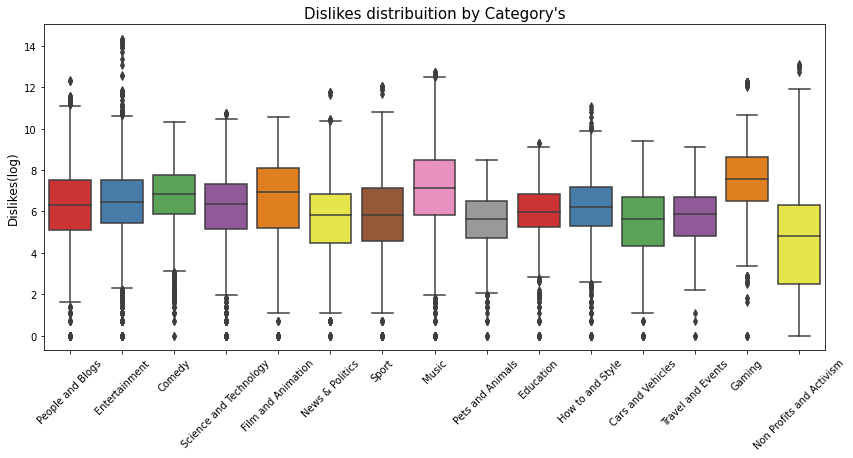

In [ ]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='dislikes_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.show()

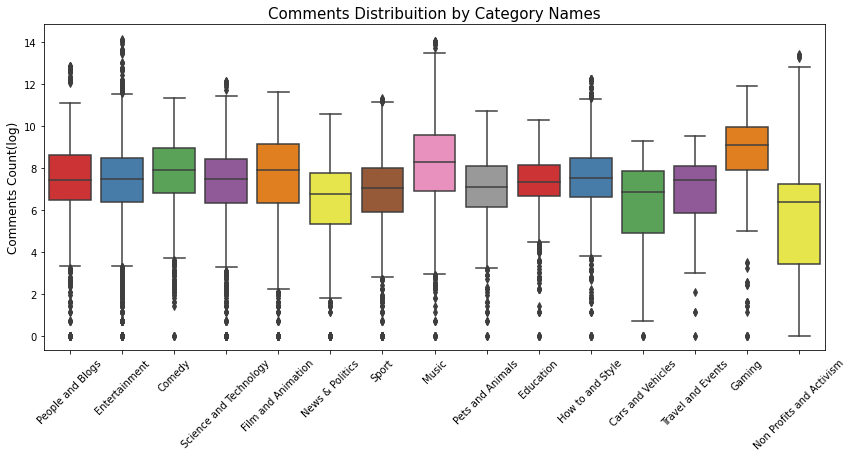

In [ ]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='comment_log', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Comments Distribuition by Category Names", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comments Count(log)", fontsize=12)

plt.show()

#NLP
- wordtovec 사용


###code

In [ ]:
#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#Setting the stopwords
eng_stopwords = set(stopwords.words("english"))

In [ ]:
#Word count in each comment:
df['count_word']=df["title"].apply(lambda x: len(str(x).split()))
df['count_word_tags']=df["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word']=df["title"].apply(lambda x: len(set(str(x).split())))
df['count_unique_word_tags']=df["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
df['count_letters']=df["title"].apply(lambda x: len(str(x)))
df['count_letters_tags']=df["tags"].apply(lambda x: len(str(x)))

#punctuation count
df["count_punctuations"] =df["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df["count_punctuations_tags"] =df["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df["count_words_upper"] = df["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df["count_words_upper_tags"] = df["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df["count_words_title"] = df["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df["count_words_title_tags"] = df["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df["count_stopwords"] = df["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df["count_stopwords_tags"] = df["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df["mean_word_len"] = df["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df["mean_word_len_tags"] = df["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [ ]:
#derived features
#Word count percent in each comment:
df['word_unique_percent']=df['count_unique_word']*100/df['count_word']
df['word_unique_percent_tags']=df['count_unique_word_tags']*100/df['count_word_tags']

#Punct percent in each comment:
df['punct_percent']=df['count_punctuations']*100/df['count_word']
df['punct_percent_tags']=df['count_punctuations_tags']*100/df['count_word_tags']

##count word distribution

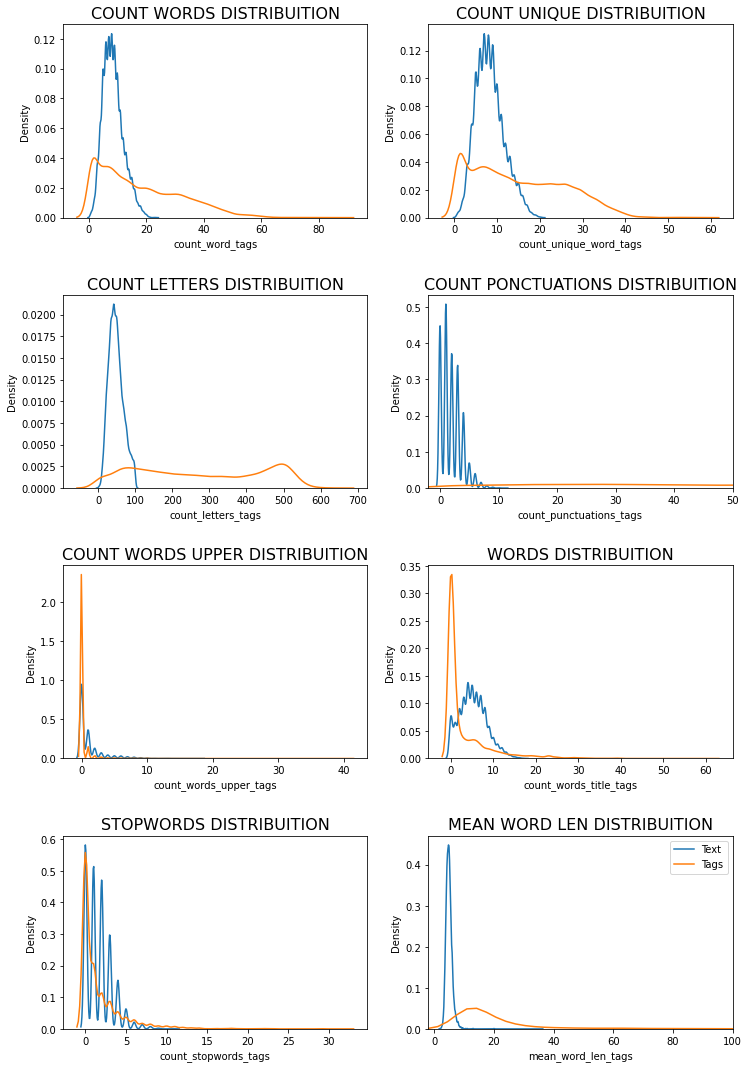

In [ ]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df['count_word'], 
                  hist=False, label='Text')
g1 = sns.distplot(df['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("COUNT WORDS DISTRIBUITION", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(df['count_unique_word'],
                  hist=False, label='Text')
g2 = sns.distplot(df['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("COUNT UNIQUE DISTRIBUITION", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(df['count_letters'], 
                  hist=False, label='Text')
g3 = sns.distplot(df['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("COUNT LETTERS DISTRIBUITION", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(df["count_punctuations"], 
                  hist=False, label='Text')
g4 = sns.distplot(df["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('COUNT PONCTUATIONS DISTRIBUITION', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(df["count_words_upper"] , 
                  hist=False, label='Text')
g5 = sns.distplot(df["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('COUNT WORDS UPPER DISTRIBUITION', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(df["count_words_title"], 
                  hist=False, label='Text')
g6 = sns.distplot(df["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('WORDS DISTRIBUITION', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(df["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(df["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('STOPWORDS DISTRIBUITION', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(df["mean_word_len"], 
                  hist=False, label='Text')
g8 = sns.distplot(df["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('MEAN WORD LEN DISTRIBUITION', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

##Word Cloud of Tagged videos

In [ ]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1 

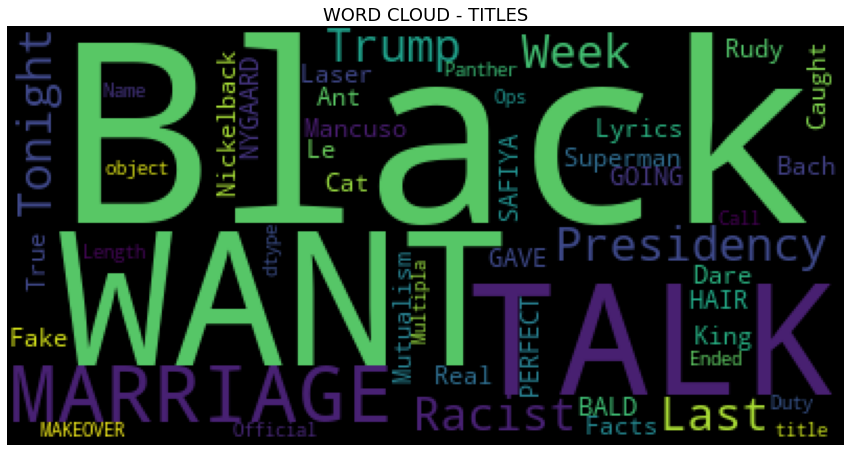

In [ ]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

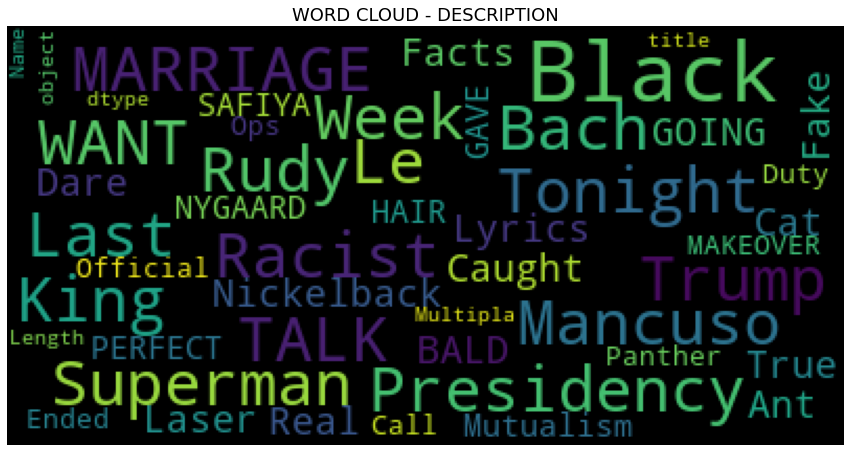

In [ ]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION")
plt.axis('off')
plt.show()

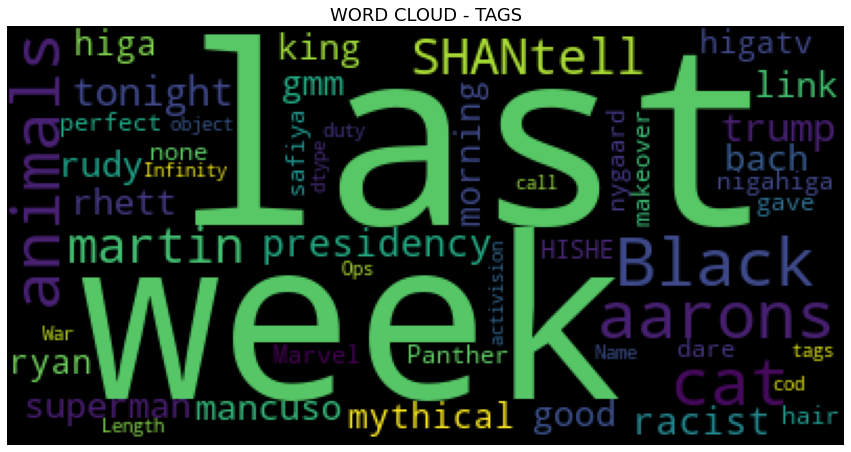

In [ ]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()